In [1]:
import json

In [5]:
with open('uswtdb_v1_1_20180710.geojson') as f:
    data = json.load(f)
data

{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4269'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-118.35321, 35.086182],
    'type': 'Point'},
   'properties': {'case_id': 3073381,
    'p_cap': 18.43,
    'p_name': '251 Wind',
    'p_tnum': 194,
    'p_year': 1987,
    't_cap': 95,
    't_conf_atr': 2,
    't_conf_loc': 3,
    't_hh': -9999,
    't_manu': 'Vestas',
    't_model': 'missing',
    't_rd': -9999,
    't_rsa': -9999,
    't_state': 'CA',
    't_ttlh': -9999,
    'xlong': -118.35321,
    'ylat': 35.086182},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-118.354362, 35.085335], 'type': 'Point'},
   'properties': {'case_id': 3073379,
    'p_cap': 18.43,
    'p_name': '251 Wind',
    'p_tnum': 194,
    'p_year': 1987,
    't_cap': 95,
    't_conf_atr': 2,
    't_conf_loc': 3,
    't_hh': -9999,
    't_manu': 'Vestas',
    't_model': 'missing',
    't_rd': -9999,
    't_rsa': -9999,
    't_state': 'CA',
    't_ttlh': -9999,
    'xlong': -118.3

In [13]:
coordinates = [feature['geometry']['coordinates'] for feature in data['features']]

In [18]:
from sklearn.cluster import KMeans
import numpy as np

coordinates = np.array(coordinates)


#Train model
kmeans = KMeans(n_clusters=5)
kmeans.fit(coordinates)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

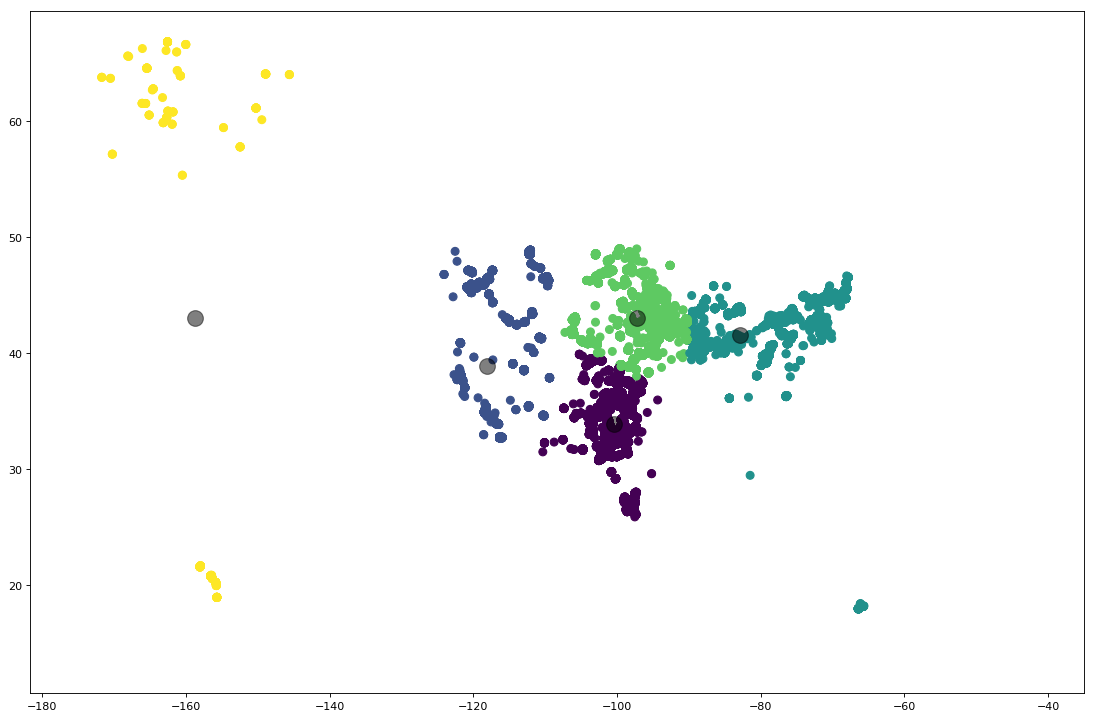

In [47]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Plot clusters
fig, ax = plt.subplots(num=None, figsize=(17, 11.3), dpi=100, edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=kmeans.predict(coordinates), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.xlim(min(coordinates[:,0]) - 10, -35)
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=200,
    alpha=0.5
)

In [48]:
fig.savefig('maptest.png', transparent=True)